In [1]:
import glob
import logging
import time

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

import skimage.color
import skimage.exposure
import skimage.feature
import skimage.io
import skimage.morphology
import skimage.transform

import yahtzee

logging.basicConfig(level=logging.DEBUG)

Took: 0.04432797431945801


/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


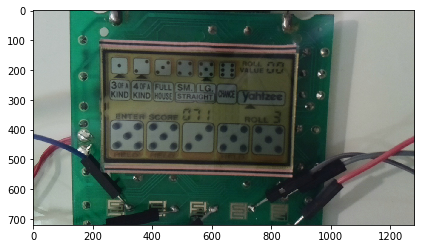

In [2]:
images = sorted(glob.glob('/Users/timpalpant/Desktop/images/*.jpg'))
start = time.time()
test = skimage.io.imread('/Users/timpalpant/Desktop/images/1cc46114-38d5-4b91-9d1a-a763c7f8e05d.jpg')
print("Took:", time.time() - start)
skimage.io.imshow(test)

/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Took: 0.6439850330352783


/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


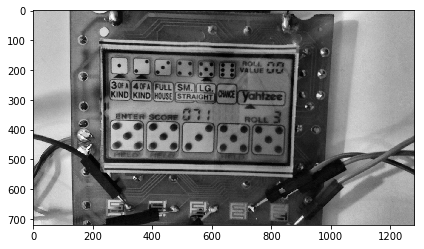

In [3]:
start = time.time()
bw = yahtzee.preprocess(test)
#bw = skimage.exposure.equalize_hist(skimage.color.rgb2gray(test))
elapsed = time.time() - start
print("Took:", elapsed)
skimage.io.imshow(bw)

Took: 0.37221717834472656


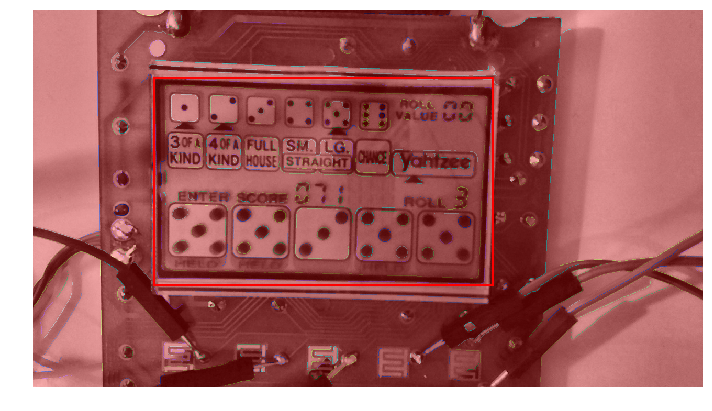

1.6363636363636365

In [4]:
start = time.time()
edges = skimage.feature.canny(bw, sigma=3)
cleared = skimage.segmentation.clear_border(edges)
label_image = skimage.measure.label(cleared)
regions = skimage.measure.regionprops(label_image)
elapsed = time.time() - start
print("Took:", elapsed)

image_label_overlay = skimage.color.label2rgb(label_image, image=bw)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

largest_region = max(regions, key=lambda r: r.area)
minr, minc, maxr, maxc = largest_region.bbox
rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                          fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

height = maxr - minr
width = maxc - minc
aspect_ratio = width / height
aspect_ratio

Took: 0.1873798370361328


/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


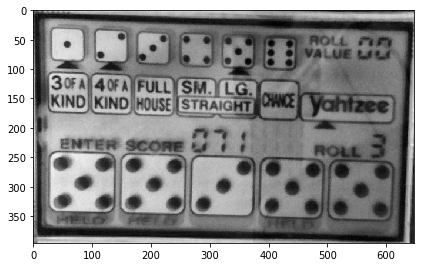

In [5]:
start = time.time()
screen = yahtzee.preprocess(test[minr:maxr, minc:maxc])
#screen = skimage.exposure.equalize_hist(skimage.color.rgb2gray(test[minr:maxr, minc:maxc]))
#screen = bw[minr:maxr, minc:maxc]
elapsed = time.time() - start
print("Took:", elapsed)
skimage.io.imshow(screen)

Took: 0.08491086959838867


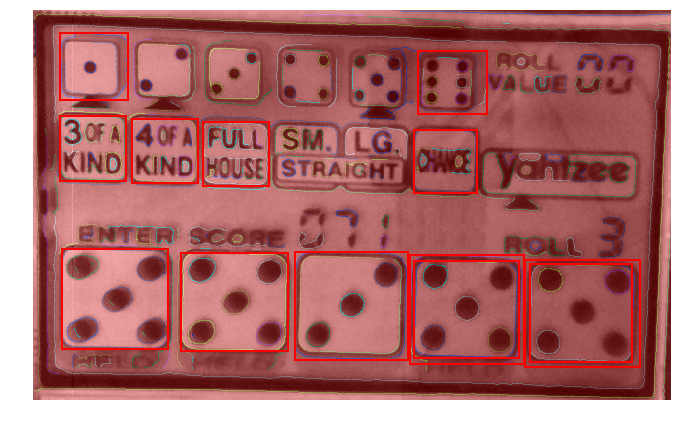

In [6]:
start = time.time()
edges = skimage.feature.canny(screen, sigma=2)
cleared = skimage.segmentation.clear_border(edges)
label_image = skimage.measure.label(cleared)
regions = skimage.measure.regionprops(label_image)
elapsed = time.time() - start
print("Took:", elapsed)

image_label_overlay = skimage.color.label2rgb(label_image, image=screen)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

candidates = []
for region in regions:
    minr, minc, maxr, maxc = region.bbox
    height = maxr - minr
    width = maxc - minc
    aspect_ratio = width / height
    if 0.9 < aspect_ratio < 1.1 and 200 < region.area < 500:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        candidates.append(region)

ax.set_axis_off()
plt.tight_layout()
plt.show()

/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Took: 1.1131930351257324
Took: 0.18439817428588867


/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
DEBUG:yahtzee:Found 290 regions in labeled image
DEBUG:yahtzee:13 dice candidates after size/aspect ratio filters
DEBUG:yahtzee:11 dice candidates after removing overlaps


Took: 0.30385422706604004


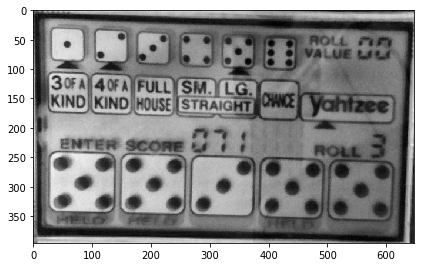

In [7]:
start = time.time()
screen = yahtzee.extract_viewport(test)
print("Took:", time.time() - start)
start = time.time()
bw = yahtzee.preprocess(screen)
print("Took:", time.time() - start)
skimage.io.imshow(bw)
start = time.time()
regions = yahtzee.extract_dice_regions(bw)
print("Took:", time.time() - start)

In [8]:
start = time.time()
yahtzee.extract_dice(test)
print("Took:", time.time() - start)

/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
DEBUG:yahtzee:Found 290 regions in labeled image
DEBUG:yahtzee:13 dice candidates after size/aspect ratio filters
DEBUG:yahtzee:11 dice candidates after removing overlaps
DEBUG:yahtzee:Selected 5 regions from image
DEBUG:yahtzee:Classifying region 242:344 x 29:136
/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
DEBUG:yahtzee:Checking 1 - R = 0.29
DEBUG:yahtzee:Checking 2 - R = 0.34
DEBUG:yahtzee:Checking 3 - R = 0.46
DEBUG:yahtzee:Checking 4 - R = 0.52
DEBUG:yahtzee:Checking 5 - R = 0.63
DEBUG:yahtzee:Checking 6 - R = 0.29
DEBUG:yahtzee:Classifying region 246:346 x 150:258


Took: 2.0931429862976074


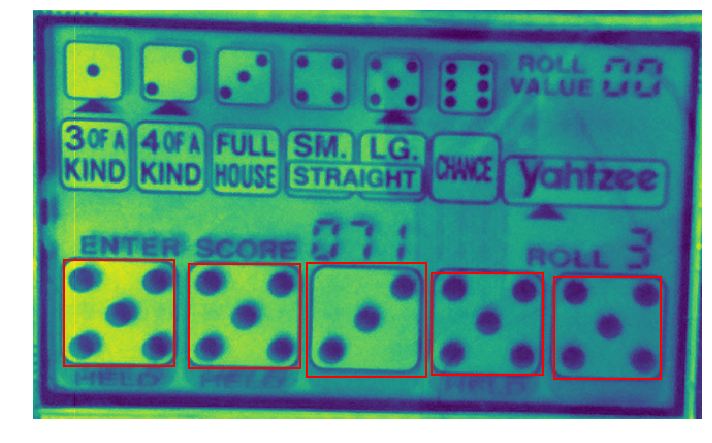

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(bw)

for r in regions:
    minr, minc, maxr, maxc = r.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

# Scale-invariant template matching

In [10]:
start = time.time()
img1 = skimage.io.imread('/Users/timpalpant/Desktop/images/f86841db-2c65-4be6-96ea-cbd0123fa964.jpg')
img1 = skimage.color.rgb2gray(img1)
img2 = skimage.io.imread('/Users/timpalpant/Desktop/images/ada6555b-2864-40dd-b343-644e7e10d550.jpg')
img2 = skimage.color.rgb2gray(img2)
print("Took:", time.time() - start)
skimage.io.imshow(img1)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/timpalpant/Desktop/images/ada6555b-2864-40dd-b343-644e7e10d550.jpg'

In [ ]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

fig, ax = plt.subplots(figsize=(10, 10))

plt.gray()

plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
ax.axis('off')

plt.show()

In [ ]:
from skimage.feature import ORB, match_descriptors

image0 = img1
image1 = bw

orb = ORB(n_keypoints=1000, fast_threshold=0.05)

orb.detect_and_extract(image0)
keypoints1 = orb.keypoints
descriptors1 = orb.descriptors

orb.detect_and_extract(image1)
keypoints2 = orb.keypoints
descriptors2 = orb.descriptors

matches12 = match_descriptors(descriptors1,
                              descriptors2,
                              cross_check=True)

In [ ]:
from skimage.transform import ProjectiveTransform
from skimage.measure import ransac

# Select keypoints from the source (image to be
# registered) and target (reference image).

src = keypoints2[matches12[:, 1]][:, ::-1]
dst = keypoints1[matches12[:, 0]][:, ::-1]

model_robust, inliers = \
    ransac((src, dst), ProjectiveTransform,
           min_samples=4, residual_threshold=2)

In [ ]:
r, c = image1.shape[:2]

# Note that transformations take coordinates in
# (x, y) format, not (row, column), in order to be
# consistent with most literature.
corners = np.array([[0, 0],
                    [0, r],
                    [c, 0],
                    [c, r]])

# Warp the image corners to their new positions.
warped_corners = model_robust(corners)

# Find the extents of both the reference image and
# the warped target image.
all_corners = np.vstack((warped_corners, corners))

corner_min = np.min(all_corners, axis=0)
corner_max = np.max(all_corners, axis=0)

output_shape = (corner_max - corner_min)
output_shape += np.abs(corner_min)
output_shape = output_shape[::-1].astype(int)

In [ ]:
from skimage.color import gray2rgb
from skimage.exposure import rescale_intensity
from skimage.transform import warp
from skimage.transform import SimilarityTransform

offset = SimilarityTransform(translation=-corner_min)

image0_ = warp(image0, offset.inverse,
               output_shape=output_shape, cval=-1)

image1_ = warp(image1, (offset + model_robust).inverse,
               output_shape=output_shape, cval=-1)

In [ ]:
def add_alpha(image, background=-1):
    """Add an alpha layer to the image.

    The alpha layer is set to 1 for foreground
    and 0 for background.
    """
    rgb = gray2rgb(image)
    alpha = (image != background)
    return np.dstack((rgb, alpha))

image0_alpha = add_alpha(image0_)
image1_alpha = add_alpha(image1_)

merged = (image0_alpha + image1_alpha)
alpha = merged[..., 3]

# The summed alpha layers give us an indication of
# how many images were combined to make up each
# pixel.  Divide by the number of images to get
# an average.
merged /= np.maximum(alpha, 1)[..., np.newaxis]

In [ ]:
skimage.io.imshow(image0_)

In [ ]:
skimage.io.imshow(image1_)